<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [61]:
# Check for GPU
!nvidia-smi

Thu Jul  6 20:43:39 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 536.40                 Driver Version: 536.40       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3080 ...  WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   55C    P8              11W /  95W |   1264MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [62]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

1.13.0+cu117


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

* Self-driving cars, such as Tesla using computer vision to percieve what's happening on the road. See Tesla AI day for more - https://youtu.be/j0z4FweCy4M
* Healthcare imaging, such as using computer vision to help interpret X-rays. Google also uses computer vision for detecting polyps in the intenstines - https://ai.googleblog.com/2021/08/improved-detection-of-elusive-polyps.html
* Security, computer vision can be used to detect whether someone is invading your home or not - https://store.google.com/au/product/nest_cam_battery?hl=en-GB

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

Overfitting is like memorizing for a test but then you can't answer a question that's slightly different.

In other words, if a model is overfitting, it's learning the training data too well and these patterns don't generalize to unseen data.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

See this article for some ideas: https://elitedatascience.com/overfitting-in-machine-learning

3 ways to prevent overfitting:

1. Regularization techniques - You could use dropout on your neural networks, dropout involves randomly removing neurons in different layers so that the remaining neurons hopefully learn more robust weights/patterns.
2. Use a different model - maybe the model you're using for a specific problem is too complicated, as in, it's learning the data too well because it has so many layers. You could remove some layers to simplify your model. Or you could pick a totally different model altogether, one that may be more suited to your particular problem. Or... you could also use transfer learning (taking the patterns from one model and applying them to your own problem).
3. Reduce noise in data/cleanup dataset/introduce data augmentation techniques - If the model is learning the data too well, it might be just memorizing the data, including the noise. One option would be to remove the noise/clean up the dataset or if this doesn't, you can introduce artificial noise through the use of data augmentation to artificially increase the diversity of your training dataset.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [63]:
from torchvision import datasets, transforms


train_data = datasets.MNIST(root='data',
                            transform=transforms.ToTensor(),
                            train=True,
                            download=True,
                            target_transform=None)

test_data = datasets.MNIST(root='data',
                           transform=transforms.ToTensor(),
                           train=False,
                           download=True,
                           target_transform=None)

len(train_data), len(test_data)

(60000, 10000)

In [64]:
print(f'train_data: {train_data}\n\ntest_data : {test_data}')

train_data: Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

test_data : Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [65]:
img, label = train_data[0]
print(f'Image size: {img.shape}, label: {label}')

Image size: torch.Size([1, 28, 28]), label: 5


## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [66]:
img, label = train_data[0][0], train_data[0][1]

print(f'image: {img}, \n\nlabel: {label}')

image: tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 

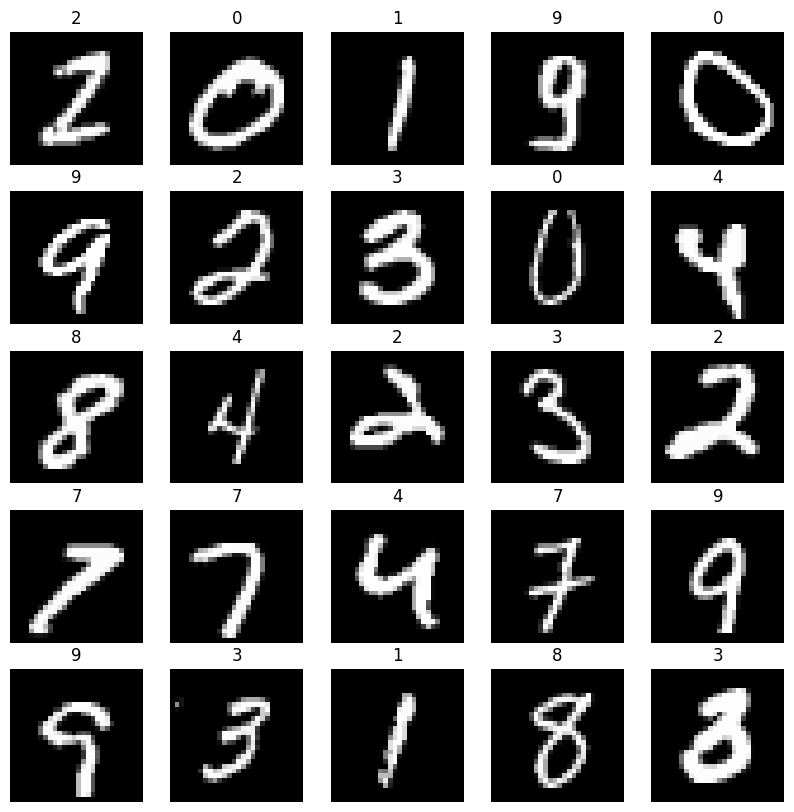

In [67]:
import matplotlib.pyplot as plt

rows, columns = 5, 5

plt.figure(figsize=(10, 10))

for index in range(1, rows*columns+1):
    # Get a random integer and set it as random index
    random_int = torch.randint(low=0, high=len(train_data), size=[1]).item()

    # Get the image and label with random index
    img, label = train_data[random_int][0], train_data[random_int][1]

    # Set the subplot parameters
    plt.subplot(rows, columns, index)
    plt.imshow(X=img.squeeze(), cmap='gray')
    plt.title(label=label)
    plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [68]:
from torch.utils.data import DataLoader

# Setup batch size
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
# train dataloader
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

# test dataloader
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1ab737ecac0>,
 <torch.utils.data.dataloader.DataLoader at 0x1ab737daa40>)

In [69]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [70]:
from torch import nn


class MNIST_model(nn.Module):
    def __init__(self, input_shape, hidden_units, out_shape) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),

            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),

            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=out_shape)

        )

    def forward(self, x):
        x = self.conv_block_1(x)
        # print(f'After conv block 1: {x.shape}')
        x = self.conv_block_2(x)
        # print(f'After conv block 2: {x.shape}')
        x = self.classifier(x)
        # print(f'After classifier: {x.shape}')
        return x

In [71]:
from torchinfo import summary

model = MNIST_model(input_shape=1,
                    hidden_units=10,
                    out_shape=10).to(device)

summary(model)

Layer (type:depth-idx)                   Param #
MNIST_model                              --
├─Sequential: 1-1                        --
│    └─Conv2d: 2-1                       100
│    └─ReLU: 2-2                         --
│    └─Conv2d: 2-3                       910
│    └─ReLU: 2-4                         --
│    └─MaxPool2d: 2-5                    --
├─Sequential: 1-2                        --
│    └─Conv2d: 2-6                       910
│    └─ReLU: 2-7                         --
│    └─Conv2d: 2-8                       910
│    └─ReLU: 2-9                         --
│    └─MaxPool2d: 2-10                   --
├─Sequential: 1-3                        --
│    └─Flatten: 2-11                     --
│    └─Linear: 2-12                      4,910
Total params: 7,740
Trainable params: 7,740
Non-trainable params: 0

In [72]:
dummies_variable = torch.rand(size=img.shape).unsqueeze(dim=0).to(device)
dummies_variable.shape

torch.Size([1, 1, 28, 28])

In [73]:
model(dummies_variable)

tensor([[ 0.0270,  0.0528, -0.0357, -0.0441, -0.0479,  0.0022,  0.0094,  0.0449,
         -0.0057,  0.0265]], device='cuda:0', grad_fn=<AddmmBackward0>)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [74]:
%%time
from tqdm.auto import tqdm

# Create model on cpu
model_cpu = MNIST_model(input_shape=1,
                        hidden_units=10,
                        out_shape=10).to('cpu')

# Train on cpu
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_cpu.parameters(),
                            lr=.1)

# Setup epochs
epochs = 5

for epoch in tqdm(range(epochs)):
    # Training loop
    train_total_loss = 0
    for batch, (X, y) in enumerate(train_dataloader):
        # Set model into train mode
        model_cpu.train()

        # Put data into target device
        X, y = map(lambda x: x.to('cpu'), [X, y])

        # 1. Forward pass
        y_pred = model_cpu(X)

        # 2. Calculate the loss
        loss = loss_fn(y_pred, y)
        train_total_loss += loss

        # 3. Optimizer zero gradient
        optimizer.zero_grad()

        # 4. Backpropagation
        loss.backward()

        # 5. Optimizer step
        optimizer.step()
    train_total_loss /= len(train_dataloader)

    # Testing loop
    test_total_loss = 0

    with torch.inference_mode():
        for batch, (test_X, test_y) in enumerate(test_dataloader):
            # Set model into evaluation mode
            model_cpu.eval()

            # Put data into target device
            test_X, test_y = map(lambda x: x.to('cpu'), [test_X, test_y])

            # 1. Forward pass
            test_y_pred = model_cpu(test_X)

            # 2. Calcualte the loss
            test_loss = loss_fn(test_y_pred, test_y)
            test_total_loss += test_loss

        test_total_loss /= len(test_dataloader)

    # Print out what's happenin'
    print(f"Epoch: {epoch} | Loss: {train_total_loss: .3f} | Test loss: {test_total_loss: .3f}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Loss:  0.345 | Test loss:  0.076
Epoch: 1 | Loss:  0.085 | Test loss:  0.067
Epoch: 2 | Loss:  0.068 | Test loss:  0.062
Epoch: 3 | Loss:  0.058 | Test loss:  0.048
Epoch: 4 | Loss:  0.052 | Test loss:  0.044
CPU times: total: 10min 7s
Wall time: 1min 33s


In [75]:
from tqdm.auto import tqdm

model_gpu = MNIST_model(input_shape=1,
                        hidden_units=10,
                        out_shape=10).to(device)

# Setup epochs
epochs = 5


# Loss function
loss_fn = nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.SGD(params=model_gpu.parameters(),
                            lr=.1)

for epoch in tqdm(range(epochs)):

    train_total_loss = 0

    # Training loop
    for batch, (X, y) in enumerate(train_dataloader):
        model_gpu.train()

        # Send data into target device
        X, y = map(lambda x: x.to(device), [X, y])

        # Forward pass
        y_pred = model_gpu(X)

        # Calculate the loss
        loss = loss_fn(y_pred, y)
        train_total_loss += loss

        # Optimizer zero gradient
        optimizer.zero_grad()

        # Backpropagation
        loss.backward()

        # Optimizer step
        optimizer.step()
    train_total_loss /= len(train_dataloader)

    # Testing loop
    test_total_loss = 0
    with torch.inference_mode():
        for batch, (test_X, test_y) in enumerate(test_dataloader):
            # Set model to evaluation mode
            model_gpu.eval()

            # Send data into target device
            test_X, test_y = map(lambda x: x.to(device), [test_X, test_y])

            # Forward pass
            test_y_pred = model_gpu(test_X)

            # Calculate the loss
            test_loss = loss_fn(test_y_pred, test_y)
            test_total_loss += test_loss
        test_total_loss /= len(test_dataloader)

    # Print out what's happenin'
    print(f'Epoch: {epoch} | Loss: {loss: .3f} | Test loss: {test_loss: .3f}')

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Loss:  0.191 | Test loss:  0.002
Epoch: 1 | Loss:  0.002 | Test loss:  0.003
Epoch: 2 | Loss:  0.002 | Test loss:  0.004
Epoch: 3 | Loss:  0.023 | Test loss:  0.000
Epoch: 4 | Loss:  0.011 | Test loss:  0.001


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

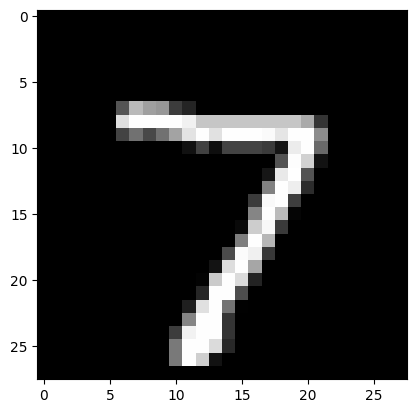

In [77]:
plt.imshow(test_data[0][0].squeeze(), cmap='gray')

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [78]:
model_pred_logit = model_gpu(test_data[0][0].unsqueeze(dim=0).to(device))
model_pred_prob = torch.softmax(model_pred_logit, dim=1)
model_pred_label = torch.argmax(model_pred_prob, dim=1)
model_pred_label

tensor([7], device='cuda:0')

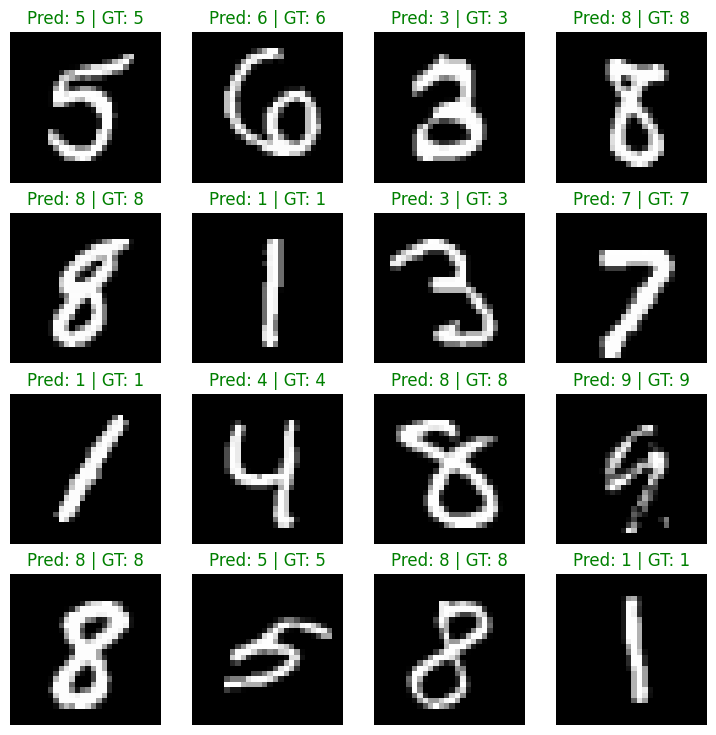

In [81]:
nrows, ncolumns = 4, 4
fig = plt.figure(figsize=(9, 9))

for i in range(1, nrows * ncolumns + 1):

    random_int = torch.randint(low=0, high=len(test_data), size=[1]).item()
    img, label = test_data[random_int]

    pred_logit = model_gpu(test_data[random_int][0].unsqueeze(dim=0).to(device))
    pred_label = torch.softmax(pred_logit, dim=1).argmax(dim=1).item()

    fig.add_subplot(nrows, ncolumns, i)
    plt.imshow(img.squeeze(), cmap='gray')

    if pred_label == label:
        plt.title(f'Pred: {pred_label} | GT: {label}', c='g')
    else:
        plt.title(f'Pred: {pred_label} | GT: {label}', c='r')

    plt.axis(False)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [84]:
random_tensor = torch.rand(size=[1, 3, 64, 64])
random_tensor.shape

torch.Size([1, 3, 64, 64])

In [89]:
kernel_3 = nn.Conv2d(in_channels=3,
                     out_channels=64,
                     kernel_size=3,
                     stride=2,
                     padding=1)

print(f'Before kernel 3*3: {random_tensor.shape}')
print(f'After kernel 3*3: {kernel_3(random_tensor).shape}')

Before kernel 3*3: torch.Size([1, 3, 64, 64])
After kernel 3*3: torch.Size([1, 64, 32, 32])


## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [90]:
# Download fashion MNIST dataset
from torchvision import datasets, transforms

fashion_train_data = datasets.FashionMNIST(root='data',
                                           transform=transforms.ToTensor(),
                                           train=True,
                                           download=True,
                                           target_transform=None)

fashion_test_data = datasets.FashionMNIST(root='data',
                                          transform=transforms.ToTensor(),
                                          train=False,
                                          download=True,
                                          target_transform=None)

len(fashion_train_data), len(fashion_test_data)

(60000, 10000)

In [92]:
from torch.utils.data import DataLoader

fashion_train_dataloader = DataLoader(dataset=fashion_train_data,
                                      batch_size=32,
                                      shuffle=True)

fashion_test_dataloader = DataLoader(dataset=fashion_test_data,
                                     batch_size=32,
                                     shuffle=False)

len(fashion_train_dataloader), len(fashion_test_dataloader)

(1875, 313)

In [95]:
# Get the classes of dataset
classes_name = fashion_train_data.classes
classes_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [97]:
model_2 = MNIST_model(input_shape=1,
                      hidden_units=10,
                      out_shape=len(classes_name)).to(device)

summary(model_2)

Layer (type:depth-idx)                   Param #
MNIST_model                              --
├─Sequential: 1-1                        --
│    └─Conv2d: 2-1                       100
│    └─ReLU: 2-2                         --
│    └─Conv2d: 2-3                       910
│    └─ReLU: 2-4                         --
│    └─MaxPool2d: 2-5                    --
├─Sequential: 1-2                        --
│    └─Conv2d: 2-6                       910
│    └─ReLU: 2-7                         --
│    └─Conv2d: 2-8                       910
│    └─ReLU: 2-9                         --
│    └─MaxPool2d: 2-10                   --
├─Sequential: 1-3                        --
│    └─Flatten: 2-11                     --
│    └─Linear: 2-12                      4,910
Total params: 7,740
Trainable params: 7,740
Non-trainable params: 0

In [100]:
# Setup the loss and optimizer
from torchmetrics import Accuracy
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=.1)

# Setup accuracy
accuracy_fn = Accuracy(task='multiclass',
                       num_classes=len(classes_name)).to(device)

In [102]:
# Setup epochs
epochs = 5

for epoch in tqdm(range(epochs)):
    train_total_loss, train_total_acc = 0, 0
    test_total_loss, test_total_acc = 0, 0

    # Training loop
    model_2.train()

    for batch, (X, y) in enumerate(fashion_train_dataloader):
        X, y = map(lambda x: x.to(device), [X, y])

        # Forward pass
        y_pred = model_2(X)

        # Calculate the loss
        loss = loss_fn(y_pred, y)
        train_total_loss += loss
        train_total_acc += accuracy_fn(y_pred, y)

        # Optimizer zero gradient
        optimizer.zero_grad()

        # Backpropagation
        loss.backward()

        # optimizer step
        optimizer.step()

    train_total_loss /= len(fashion_train_dataloader)
    train_total_acc /= len(fashion_train_dataloader)

    # Training loop
    with torch.inference_mode():
        model_2.eval()
        for batch, (test_X, test_y) in enumerate(fashion_test_dataloader):
            test_X, test_y = map(lambda x: x.to(device), [test_X, test_y])

            # Forward pass
            test_y_pred = model_2(test_X)

            # Calculate the loss
            test_total_loss += loss_fn(test_y_pred, test_y)
            test_total_acc += accuracy_fn(test_y_pred, test_y)

        test_total_loss /= len(fashion_test_dataloader)
        test_total_acc /= len(fashion_test_dataloader)

    # Print out what's happening
    print(f'Epoch: {epoch} | Loss: {train_total_loss:.3f} | Acc: {train_total_acc:.3f} | Test loss: {test_total_loss:.3f} | Test Acc: {test_total_acc:.3f}')

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Loss: 0.591 | Acc: 0.788 | Test loss: 0.395 | Test Acc: 0.859
Epoch: 1 | Loss: 0.361 | Acc: 0.870 | Test loss: 0.349 | Test Acc: 0.872
Epoch: 2 | Loss: 0.326 | Acc: 0.883 | Test loss: 0.353 | Test Acc: 0.868
Epoch: 3 | Loss: 0.303 | Acc: 0.891 | Test loss: 0.309 | Test Acc: 0.891
Epoch: 4 | Loss: 0.289 | Acc: 0.896 | Test loss: 0.291 | Test Acc: 0.894


In [104]:
# Make prediction with model 2
test_preds = []

with torch.inference_mode():
    model_2.eval()

    for test_X, test_y in tqdm(fashion_test_dataloader):
        y_logits = model_2(test_X.to(device))
        y_pred_lables = torch.softmax(y_logits, dim=1).argmax(dim=1)

        test_preds.append(y_pred_lables)

test_preds = torch.cat(test_preds).cpu()
test_preds[:10], len(test_preds)

  0%|          | 0/313 [00:00<?, ?it/s]

(tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]), 10000)

In [107]:
# Get wrong prediction indexes
import numpy as np
wrong_pred_indexes = np.where(test_preds != fashion_test_data.targets)[0]
len(wrong_pred_indexes)

1060

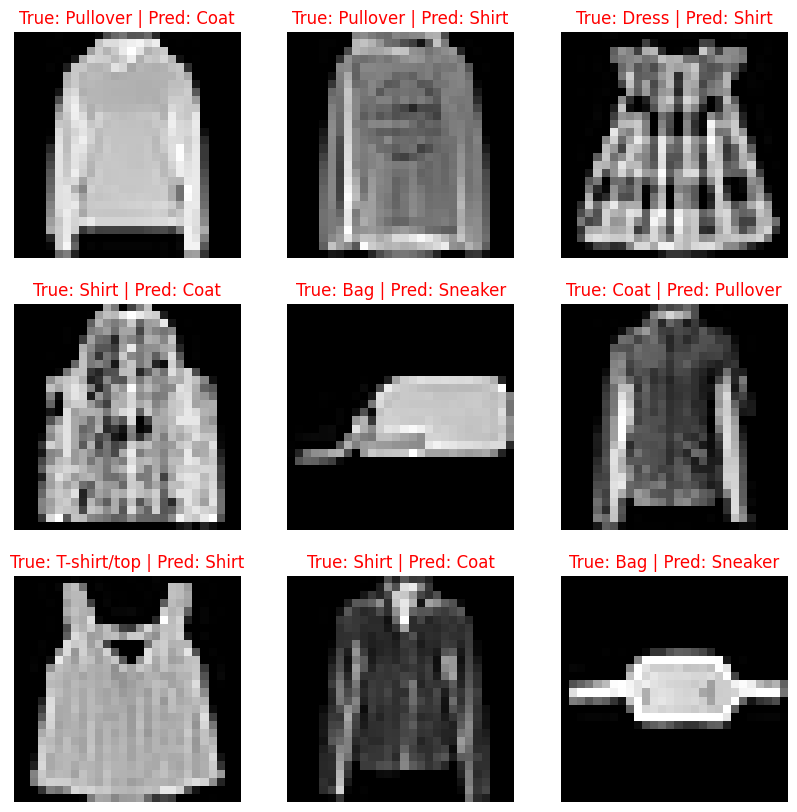

In [108]:
# Select random 9 wrong predictions and plot them
import random
random_selection = random.sample(list(wrong_pred_indexes), k=9)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_selection):
    # Get true and pred labels
    true_label = classes_name[fashion_test_data[idx][1]]
    pred_label = classes_name[test_preds[idx]]

    # Plot the wrong prediction with its original label
    plt.subplot(3, 3, i+1)
    plt.imshow(fashion_test_data[idx][0].squeeze(), cmap="gray")
    plt.title(f"True: {true_label} | Pred: {pred_label}", c="r")
    plt.axis(False)